# Keras 선형회귀를 사용한 Taxi 수요 예측  
__2020.04.29__  
__유휘근__  


## 모듈 import

In [247]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from keras import metrics

# 노트북에 그래프를 그리기 위해
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
from matplotlib import rc

# 시각화 그래프 '-' & 한글 깨짐 현상 처리
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

mpl.rcParams['axes.unicode_minus'] = False
font_name = fm.FontProperties(fname='c:\\windows\\fonts\\malgun.ttf').get_name()
rc('font', family=font_name)

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 경고메시지 숨김
import warnings
warnings.filterwarnings(action='ignore')
# 경고메시지 다시 보이게
#warnings.filterwarnings(action='default')

## 데이터 준비

### 데이터 로드

#### 어제,오늘,내일 휴일여부와 날씨를 포함한 택시승차 데이터셋

In [203]:
taxi = pd.read_csv('data/T-Money/seolleung_dataset.csv')
taxi

,o_time,yesterday,today,tomorrow,temp,windspeed,humidity,cloud,precipitation,snowcover,visibility,user,count
0,2018-10-01 00:00:00,1,0,0,14.1,2.6,55,0.0,0.0,0.0,2000,1.0,52
1,2018-10-01 01:00:00,1,0,0,13.9,2.0,57,2.0,0.0,0.0,2000,1.0,17
2,2018-10-01 02:00:00,1,0,0,13.9,2.4,56,4.0,0.0,0.0,2000,1.0,10
3,2018-10-01 03:00:00,1,0,0,13.6,1.6,56,8.0,0.0,0.0,2000,1.0,13
4,2018-10-01 04:00:00,1,0,0,13.7,1.9,56,10.0,0.0,0.0,2000,1.0,12
5,2018-10-01 05:00:00,1,0,0,13.7,1.8,57,8.0,0.0,0.0,1999,1.0,8
6,2018-10-01 06:00:00,1,0,0,13.3,2.3,56,7.0,0.0,0.0,2000,1.0,14
7,2018-10-01 07:00:00,1,0,0,13.1,2.1,58,3.0,0.0,0.0,1997,1.0,31
8,2018-10-01 08:00:00,1,0,0,13.7,2.4,54,7.0,0.0,0.0,1960,1.0,148
9,2018-10-01 09:00:00,1,0,0,14.9,3.4,50,1.0,0.0,0.0,1989,1.0,130


#### 위 데이터셋에서 유동인구 컬럼이 추가된 데이터셋

In [204]:
taxi_add_pop = pd.read_csv('data/T-Money/seolleung_dataset_add_POP.csv')
taxi_add_pop

,o_time,yesterday,today,tomorrow,temp,windspeed,humidity,cloud,precipitation,snowcover,visibility,pop,count
0,2018-10-01 00:00:00,1,0,0,14.1,2.6,55,0.0,0.0,0.0,2000,299.31,52
1,2018-10-01 01:00:00,1,0,0,13.9,2.0,57,2.0,0.0,0.0,2000,196.59,17
2,2018-10-01 02:00:00,1,0,0,13.9,2.4,56,4.0,0.0,0.0,2000,173.37,10
3,2018-10-01 03:00:00,1,0,0,13.6,1.6,56,8.0,0.0,0.0,2000,131.52,13
4,2018-10-01 04:00:00,1,0,0,13.7,1.9,56,10.0,0.0,0.0,2000,254.17,12
5,2018-10-01 05:00:00,1,0,0,13.7,1.8,57,8.0,0.0,0.0,1999,1430.63,8
6,2018-10-01 06:00:00,1,0,0,13.3,2.3,56,7.0,0.0,0.0,2000,4227.82,14
7,2018-10-01 07:00:00,1,0,0,13.1,2.1,58,3.0,0.0,0.0,1997,12881.29,31
8,2018-10-01 08:00:00,1,0,0,13.7,2.4,54,7.0,0.0,0.0,1960,15716.97,148
9,2018-10-01 09:00:00,1,0,0,14.9,3.4,50,1.0,0.0,0.0,1989,8038.56,130


### 시간 변수 추가

In [207]:
# 시간 변수 추가를 위해 o_time 컬럼 데이터타입 문자열에서 datetime 으로 변경
taxi['o_time'] = taxi.o_time.apply(pd.to_datetime)
taxi_add_pop['o_time'] = taxi_add_pop.o_time.apply(pd.to_datetime)
#taxi['_time'] = pd.to_datetime(taxi['o_time'],format='%Y-%m-%d %H:%M:%S')

# datetime 타입에서 년,월,일,시간 추출
taxi['hour'] = taxi['o_time'].dt.hour
taxi_add_pop['hour'] = taxi_add_pop['o_time'].dt.hour

### o_time 컬럼 제거

In [208]:
data1 = taxi.drop(['o_time'],axis=1, inplace=False)
data1

data2 = taxi_add_pop.drop(['o_time'], axis=1, inplace=False)
data2

,yesterday,today,tomorrow,temp,windspeed,humidity,cloud,precipitation,snowcover,visibility,pop,count,hour
0,1,0,0,14.1,2.6,55,0.0,0.0,0.0,2000,299.31,52,0
1,1,0,0,13.9,2.0,57,2.0,0.0,0.0,2000,196.59,17,1
2,1,0,0,13.9,2.4,56,4.0,0.0,0.0,2000,173.37,10,2
3,1,0,0,13.6,1.6,56,8.0,0.0,0.0,2000,131.52,13,3
4,1,0,0,13.7,1.9,56,10.0,0.0,0.0,2000,254.17,12,4
5,1,0,0,13.7,1.8,57,8.0,0.0,0.0,1999,1430.63,8,5
6,1,0,0,13.3,2.3,56,7.0,0.0,0.0,2000,4227.82,14,6
7,1,0,0,13.1,2.1,58,3.0,0.0,0.0,1997,12881.29,31,7
8,1,0,0,13.7,2.4,54,7.0,0.0,0.0,1960,15716.97,148,8
9,1,0,0,14.9,3.4,50,1.0,0.0,0.0,1989,8038.56,130,9


## train, test Dataset 분리

In [142]:
# 유동인구 제외한 데이터셋
y_target1 = data1['count']
X_data1 = data1.drop(['count'], axis=1,inplace=False)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_data1, y_target1, test_size=0.3, random_state=156)

# 유동인구 컬럼 추가된 데이터셋
y_target2 = data2['count']
X_data2 = data2.drop(['count'], axis=1,inplace=False)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data2, y_target2, test_size=0.3, random_state=156)

## 성능평가 함수 생성

In [240]:
def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def evaluate_regr(y,pred):
    mae_val = mean_absolute_error(y,pred)
    mse_val = mean_squared_error(y,pred)
    rmse_val = rmse(y,pred)
    rmsle_val = rmsle(y,pred)
    print('MAE : {0:.3f}, MSE : {1:.3F}, RMSE : {2:.3F}, RMSLE : {3:.3F}'.format(mae_val,mse_val,rmse_val,rmsle_val))

## Keras 모델 생성 & 예측 & 평가

### 피쳐개수를 입력받아 모델을 생성하는 함수

In [144]:
def create_model(num_of_params):
    num_of_hidden_nodes = 100
    
    main_input = keras.layers.Input((num_of_params,), name='input_node')
    
    dense_00 = keras.layers.Dense(num_of_params, activation='relu')(main_input)
    dropout_00 = keras.layers.Dropout(0.1)(dense_00)
    
    dense_01 = keras.layers.Dense(num_of_hidden_nodes, activation='relu')(dropout_00)
    dropout_01 = keras.layers.Dropout(0.1)(dense_01)
    
    dense_02 = keras.layers.Dense(num_of_hidden_nodes, activation='relu')(dropout_01)
    dropout_02 = keras.layers.Dropout(0.1)(dense_02)
    
    dense_05 = keras.layers.Dense(50, activation='relu')(dropout_02)
    output = keras.layers.Dense(1, activation='linear', name="output_node")(dense_05)
    
    model = keras.models.Model(inputs=[main_input], outputs=[output], name="aitaxi_model_sg")
    model.compile(loss='mean_squared_error', 
                  optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8), 
                  metrics=[metrics.mse, metrics.mean_absolute_percentage_error])
    return model

### 유동인구 제외한 데이터셋

#### 모델 생성 & 훈련

In [167]:
model1 = create_model(X_train1.shape[1])
hist1 = model1.fit(X_train1, y_train1, validation_data=(X_test1, y_test1), epochs=2000, batch_size=100, shuffle=True, verbose=0)

AttributeError: 'History' object has no attribute 'plot'

In [169]:
hist1.history.keys()

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_percentage_error'])

##### 훈련, 검증 MSE, MAPE 확인

In [170]:
df1 = pd.DataFrame(hist1.history)
df1

,loss,mean_squared_error,mean_absolute_percentage_error,val_loss,val_mean_squared_error,val_mean_absolute_percentage_error
0,6704.173192,6704.172852,119.070137,2770.964637,2770.964844,82.673233
1,3300.510279,3300.510254,88.425346,3406.811047,3406.810791,63.833214
2,3179.266497,3179.266846,88.116913,3082.590451,3082.590332,66.305557
3,3049.371452,3049.371338,84.169601,3015.554322,3015.554199,66.980934
4,2938.780966,2938.781250,84.741058,2919.763619,2919.763428,67.060768
5,2914.583597,2914.583496,84.590988,2825.128124,2825.128174,68.596741
6,2894.783469,2894.783447,84.141953,2769.998252,2769.998535,68.837158
7,2829.890338,2829.890381,83.894241,2859.105566,2859.105957,66.567406
8,2758.358869,2758.358887,84.280327,2868.951683,2868.951660,64.460281
9,2734.675947,2734.676270,84.461510,2909.910788,2909.910645,63.118504


##### 최종 RMSE

In [187]:
print('trian : %f \ntest : %f' % (np.sqrt(402),np.sqrt(776)))

trian : 20.049938 
test : 27.856777


##### 오차 시각화

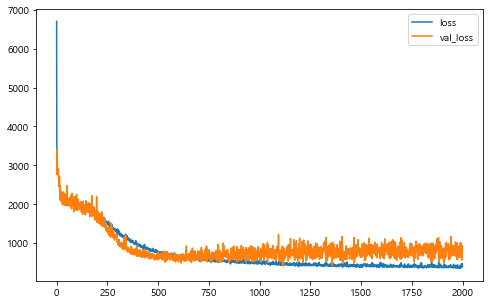

In [192]:
plt.figure(figsize=(8,5))
plt.plot(df1['loss'])
plt.plot(df1['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

#### 전체 데이터 예측

##### 예측값 컬럼 추가

In [172]:
pre1 = data1
pre1

,yesterday,today,tomorrow,temp,windspeed,humidity,cloud,precipitation,snowcover,visibility,user,count,hour
0,1,0,0,14.1,2.6,55,0.0,0.0,0.0,2000,1.0,52,0
1,1,0,0,13.9,2.0,57,2.0,0.0,0.0,2000,1.0,17,1
2,1,0,0,13.9,2.4,56,4.0,0.0,0.0,2000,1.0,10,2
3,1,0,0,13.6,1.6,56,8.0,0.0,0.0,2000,1.0,13,3
4,1,0,0,13.7,1.9,56,10.0,0.0,0.0,2000,1.0,12,4
5,1,0,0,13.7,1.8,57,8.0,0.0,0.0,1999,1.0,8,5
6,1,0,0,13.3,2.3,56,7.0,0.0,0.0,2000,1.0,14,6
7,1,0,0,13.1,2.1,58,3.0,0.0,0.0,1997,1.0,31,7
8,1,0,0,13.7,2.4,54,7.0,0.0,0.0,1960,1.0,148,8
9,1,0,0,14.9,3.4,50,1.0,0.0,0.0,1989,1.0,130,9


In [173]:
pre1.drop('count',axis=1,inplace=True)
pre1

,yesterday,today,tomorrow,temp,windspeed,humidity,cloud,precipitation,snowcover,visibility,user,hour
0,1,0,0,14.1,2.6,55,0.0,0.0,0.0,2000,1.0,0
1,1,0,0,13.9,2.0,57,2.0,0.0,0.0,2000,1.0,1
2,1,0,0,13.9,2.4,56,4.0,0.0,0.0,2000,1.0,2
3,1,0,0,13.6,1.6,56,8.0,0.0,0.0,2000,1.0,3
4,1,0,0,13.7,1.9,56,10.0,0.0,0.0,2000,1.0,4
5,1,0,0,13.7,1.8,57,8.0,0.0,0.0,1999,1.0,5
6,1,0,0,13.3,2.3,56,7.0,0.0,0.0,2000,1.0,6
7,1,0,0,13.1,2.1,58,3.0,0.0,0.0,1997,1.0,7
8,1,0,0,13.7,2.4,54,7.0,0.0,0.0,1960,1.0,8
9,1,0,0,14.9,3.4,50,1.0,0.0,0.0,1989,1.0,9


In [175]:
a = model1.predict(pre1)
a

array([[54.24384 ],
       [36.705185],
       [24.370653],
       ...,
       [33.15311 ],
       [33.129276],
       [32.292435]], dtype=float32)

In [283]:
test1 = taxi.reset_index(inplace=False)
evaluate_regr(test1['count'],np.ravel(a))

MAE : 18.604, MSE : 803.382, RMSE : 28.344, RMSLE : 0.362


In [176]:
taxi['pred'] = a
taxi

,o_time,yesterday,today,tomorrow,temp,windspeed,humidity,cloud,precipitation,snowcover,visibility,user,count,hour,pred
0,2018-10-01 00:00:00,1,0,0,14.1,2.6,55,0.0,0.0,0.0,2000,1.0,52,0,54.243839
1,2018-10-01 01:00:00,1,0,0,13.9,2.0,57,2.0,0.0,0.0,2000,1.0,17,1,36.705185
2,2018-10-01 02:00:00,1,0,0,13.9,2.4,56,4.0,0.0,0.0,2000,1.0,10,2,24.370653
3,2018-10-01 03:00:00,1,0,0,13.6,1.6,56,8.0,0.0,0.0,2000,1.0,13,3,20.555487
4,2018-10-01 04:00:00,1,0,0,13.7,1.9,56,10.0,0.0,0.0,2000,1.0,12,4,17.707607
5,2018-10-01 05:00:00,1,0,0,13.7,1.8,57,8.0,0.0,0.0,1999,1.0,8,5,15.888308
6,2018-10-01 06:00:00,1,0,0,13.3,2.3,56,7.0,0.0,0.0,2000,1.0,14,6,15.976875
7,2018-10-01 07:00:00,1,0,0,13.1,2.1,58,3.0,0.0,0.0,1997,1.0,31,7,20.957434
8,2018-10-01 08:00:00,1,0,0,13.7,2.4,54,7.0,0.0,0.0,1960,1.0,148,8,107.161522
9,2018-10-01 09:00:00,1,0,0,14.9,3.4,50,1.0,0.0,0.0,1989,1.0,130,9,126.886116


#### 실제값, 예측값 시각화

In [180]:
taxi.set_index('o_time',inplace=True)

##### 18-10-01 ~ 19-03-31 전체 확인

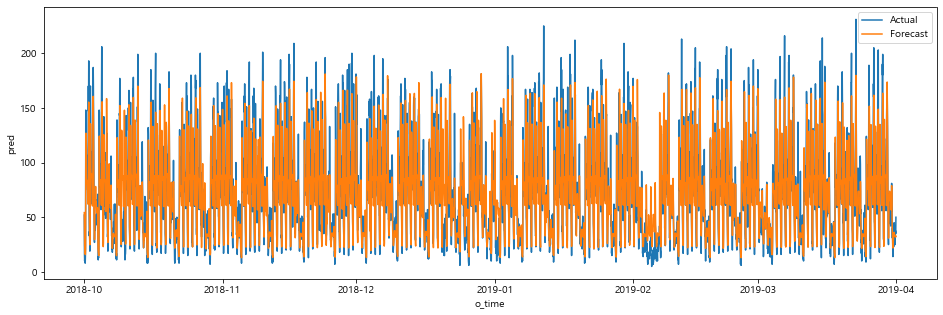

In [181]:
plt.figure(figsize=(16,5))
sns.lineplot(x=taxi.index,y='count',data=taxi)
sns.lineplot(x=taxi.index,y='pred',data=taxi)
plt.legend(['Actual','Forecast'])
plt.show()

##### 2018-10 한달 확인

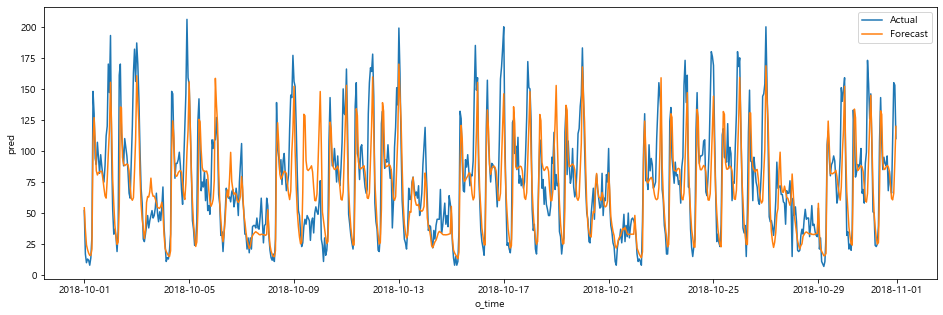

In [182]:
plt.figure(figsize=(16,5))
sns.lineplot(x=taxi['2018-10'].index,y='count',data=taxi['2018-10'])
sns.lineplot(x=taxi['2018-10'].index,y='pred',data=taxi['2018-10'])
plt.legend(['Actual','Forecast'])
plt.show()

##### 2019-01-01 ~ 2019-01-08 일주일 확인

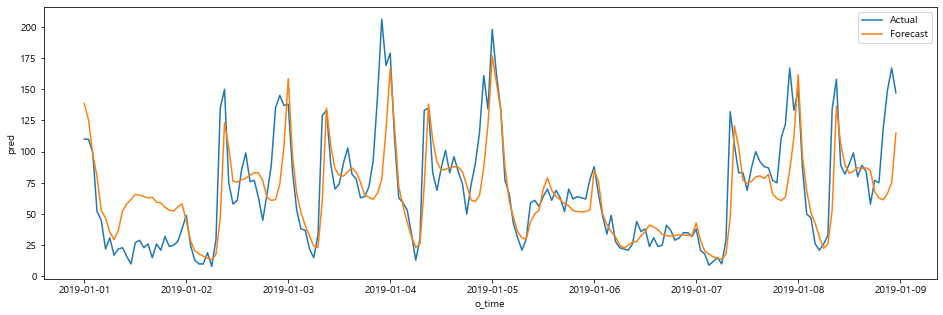

In [183]:
plt.figure(figsize=(16,5))
sns.lineplot(x=taxi['2019-01-01':'2019-01-08'].index,y='count',data=taxi['2019-01-01':'2019-01-08'])
sns.lineplot(x=taxi['2019-01-01':'2019-01-08'].index,y='pred',data=taxi['2019-01-01':'2019-01-08'])
plt.legend(['Actual','Forecast'])
plt.show()

### 유동인구 추가한 데이터셋

#### 모델 생성 & 훈련

In [184]:
model2 = create_model(X_train2.shape[1])
hist2 = model2.fit(X_train2, y_train2, validation_data=(X_test2, y_test2), epochs=2000, batch_size=100, shuffle=True, verbose=0)

In [185]:
hist2.history.keys()

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_percentage_error'])

##### 훈련, 검증 MSE, MAPE 확인

In [186]:
df2 = pd.DataFrame(hist2.history)
df2

,loss,mean_squared_error,mean_absolute_percentage_error,val_loss,val_mean_squared_error,val_mean_absolute_percentage_error
0,17766.147566,17766.146484,158.173996,3024.457844,3024.457764,60.093594
1,6523.344603,6523.344238,102.352234,3044.110004,3044.110107,62.759697
2,4809.446083,4809.445801,91.729965,2816.971866,2816.971680,63.033966
3,3899.578058,3899.578369,82.969917,2971.303037,2971.303223,65.297829
4,3476.405393,3476.404541,81.993439,2598.677467,2598.677490,62.915989
5,3370.765483,3370.765869,80.115791,2533.178125,2533.178223,65.544167
6,3081.862807,3081.862305,77.557861,2443.617124,2443.617188,64.471947
7,3080.249671,3080.249268,78.134209,2726.866308,2726.866211,60.054680
8,2991.040948,2991.040771,76.868553,2550.718244,2550.718262,61.916763
9,2822.639942,2822.640137,75.591515,2613.287233,2613.287354,61.674809


##### 최종 RMSE

In [188]:
print('trian : %f \ntest : %f' % (np.sqrt(401),np.sqrt(549)))

trian : 20.024984 
test : 23.430749


##### 오차 시각화

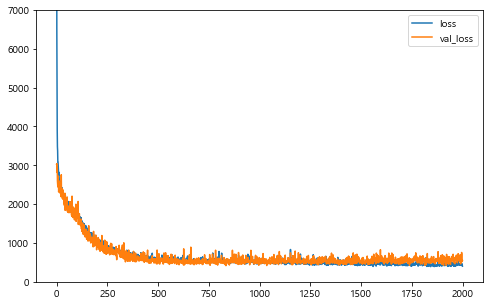

In [191]:
plt.figure(figsize=(8,5))
plt.plot(df2['loss'])
plt.plot(df2['val_loss'])
plt.legend(['loss','val_loss'])
plt.ylim(0,7000)
plt.show()

#### 전체 데이터 예측

##### 예측값 컬럼 추가

In [193]:
pre2 = data2
pre2

,yesterday,today,tomorrow,temp,windspeed,humidity,cloud,precipitation,snowcover,visibility,pop,count,hour
0,1,0,0,14.1,2.6,55,0.0,0.0,0.0,2000,299.31,52,0
1,1,0,0,13.9,2.0,57,2.0,0.0,0.0,2000,196.59,17,1
2,1,0,0,13.9,2.4,56,4.0,0.0,0.0,2000,173.37,10,2
3,1,0,0,13.6,1.6,56,8.0,0.0,0.0,2000,131.52,13,3
4,1,0,0,13.7,1.9,56,10.0,0.0,0.0,2000,254.17,12,4
5,1,0,0,13.7,1.8,57,8.0,0.0,0.0,1999,1430.63,8,5
6,1,0,0,13.3,2.3,56,7.0,0.0,0.0,2000,4227.82,14,6
7,1,0,0,13.1,2.1,58,3.0,0.0,0.0,1997,12881.29,31,7
8,1,0,0,13.7,2.4,54,7.0,0.0,0.0,1960,15716.97,148,8
9,1,0,0,14.9,3.4,50,1.0,0.0,0.0,1989,8038.56,130,9


In [194]:
pre2.drop('count',axis=1,inplace=True)
pre2

,yesterday,today,tomorrow,temp,windspeed,humidity,cloud,precipitation,snowcover,visibility,pop,hour
0,1,0,0,14.1,2.6,55,0.0,0.0,0.0,2000,299.31,0
1,1,0,0,13.9,2.0,57,2.0,0.0,0.0,2000,196.59,1
2,1,0,0,13.9,2.4,56,4.0,0.0,0.0,2000,173.37,2
3,1,0,0,13.6,1.6,56,8.0,0.0,0.0,2000,131.52,3
4,1,0,0,13.7,1.9,56,10.0,0.0,0.0,2000,254.17,4
5,1,0,0,13.7,1.8,57,8.0,0.0,0.0,1999,1430.63,5
6,1,0,0,13.3,2.3,56,7.0,0.0,0.0,2000,4227.82,6
7,1,0,0,13.1,2.1,58,3.0,0.0,0.0,1997,12881.29,7
8,1,0,0,13.7,2.4,54,7.0,0.0,0.0,1960,15716.97,8
9,1,0,0,14.9,3.4,50,1.0,0.0,0.0,1989,8038.56,9


In [195]:
b = model2.predict(pre2)
b

array([[40.210796],
       [18.694351],
       [16.531153],
       ...,
       [32.46341 ],
       [32.653297],
       [37.822514]], dtype=float32)

In [280]:
test1 = taxi.reset_index(inplace=False)
evaluate_regr(test1['count'],np.ravel(b))

MAE : 15.705, MSE : 557.609, RMSE : 23.614, RMSLE : 0.302


In [196]:
taxi_add_pop['pred'] = b
taxi_add_pop

,o_time,yesterday,today,tomorrow,temp,windspeed,humidity,cloud,precipitation,snowcover,visibility,pop,count,hour,pred
0,2018-10-01 00:00:00,1,0,0,14.1,2.6,55,0.0,0.0,0.0,2000,299.31,52,0,40.210796
1,2018-10-01 01:00:00,1,0,0,13.9,2.0,57,2.0,0.0,0.0,2000,196.59,17,1,18.694351
2,2018-10-01 02:00:00,1,0,0,13.9,2.4,56,4.0,0.0,0.0,2000,173.37,10,2,16.531153
3,2018-10-01 03:00:00,1,0,0,13.6,1.6,56,8.0,0.0,0.0,2000,131.52,13,3,14.367600
4,2018-10-01 04:00:00,1,0,0,13.7,1.9,56,10.0,0.0,0.0,2000,254.17,12,4,17.566624
5,2018-10-01 05:00:00,1,0,0,13.7,1.8,57,8.0,0.0,0.0,1999,1430.63,8,5,22.026875
6,2018-10-01 06:00:00,1,0,0,13.3,2.3,56,7.0,0.0,0.0,2000,4227.82,14,6,17.453770
7,2018-10-01 07:00:00,1,0,0,13.1,2.1,58,3.0,0.0,0.0,1997,12881.29,31,7,34.047764
8,2018-10-01 08:00:00,1,0,0,13.7,2.4,54,7.0,0.0,0.0,1960,15716.97,148,8,78.107651
9,2018-10-01 09:00:00,1,0,0,14.9,3.4,50,1.0,0.0,0.0,1989,8038.56,130,9,128.596359


#### 실제값, 예측값 시각화

In [197]:
taxi_add_pop.set_index('o_time',inplace=True)

##### 18-10-01 ~ 19-03-31 전체 확인

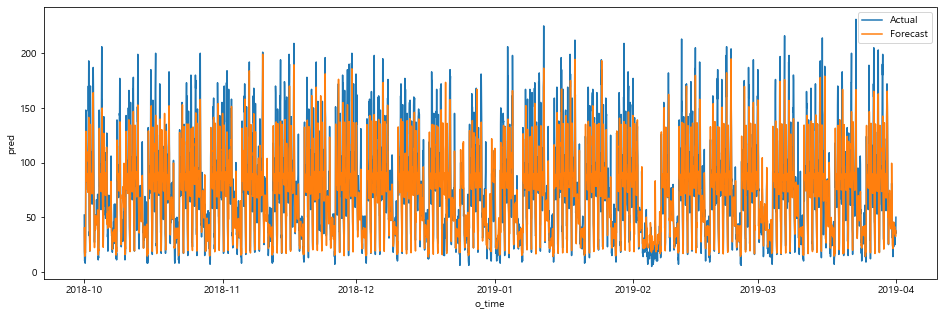

In [198]:
plt.figure(figsize=(16,5))
sns.lineplot(x=taxi_add_pop.index,y='count',data=taxi_add_pop)
sns.lineplot(x=taxi_add_pop.index,y='pred',data=taxi_add_pop)
plt.legend(['Actual','Forecast'])
plt.show()

##### 2018-10 한달 확인

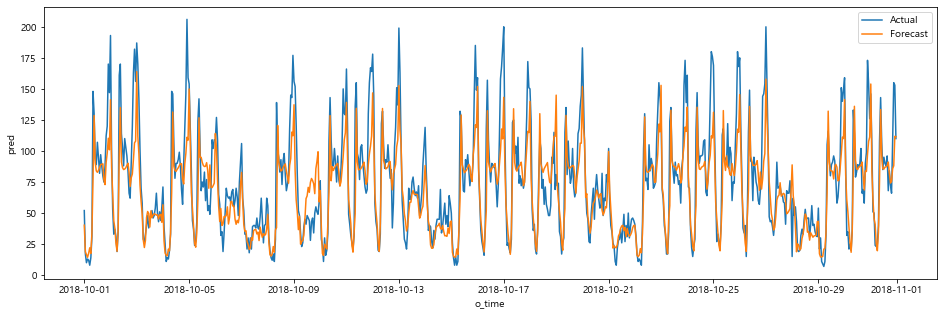

In [199]:
plt.figure(figsize=(16,5))
sns.lineplot(x=taxi_add_pop['2018-10'].index,y='count',data=taxi_add_pop['2018-10'])
sns.lineplot(x=taxi_add_pop['2018-10'].index,y='pred',data=taxi_add_pop['2018-10'])
plt.legend(['Actual','Forecast'])
plt.show()

##### 2019-01-01 ~ 2019-01-08 일주일 확인

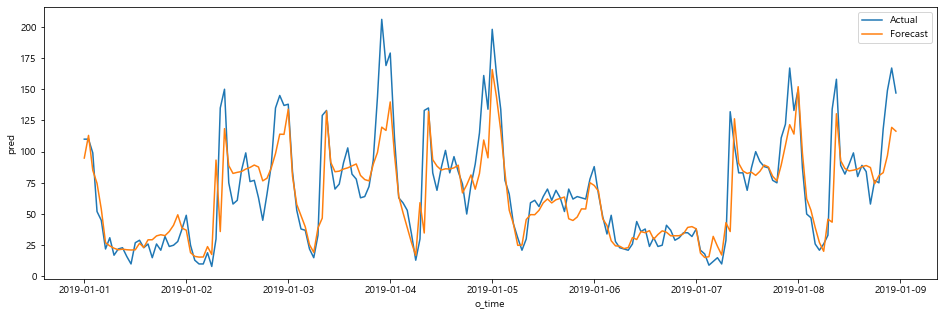

In [200]:
plt.figure(figsize=(16,5))
sns.lineplot(x=taxi_add_pop['2019-01-01':'2019-01-08'].index,y='count',data=taxi_add_pop['2019-01-01':'2019-01-08'])
sns.lineplot(x=taxi_add_pop['2019-01-01':'2019-01-08'].index,y='pred',data=taxi_add_pop['2019-01-01':'2019-01-08'])
plt.legend(['Actual','Forecast'])
plt.show()

### 날씨컬럼 중 풍속, 습도,시정 제외하고 훈련 & 예측 (유동인구 제외한 데이터셋)

#### 풍속,습도,시정 제외 데이터셋 생성

In [209]:
data3 = data1.drop(['windspeed','humidity','visibility'],axis=1,inplace=False)
data3

,yesterday,today,tomorrow,temp,cloud,precipitation,snowcover,user,count,hour
0,1,0,0,14.1,0.0,0.0,0.0,1.0,52,0
1,1,0,0,13.9,2.0,0.0,0.0,1.0,17,1
2,1,0,0,13.9,4.0,0.0,0.0,1.0,10,2
3,1,0,0,13.6,8.0,0.0,0.0,1.0,13,3
4,1,0,0,13.7,10.0,0.0,0.0,1.0,12,4
5,1,0,0,13.7,8.0,0.0,0.0,1.0,8,5
6,1,0,0,13.3,7.0,0.0,0.0,1.0,14,6
7,1,0,0,13.1,3.0,0.0,0.0,1.0,31,7
8,1,0,0,13.7,7.0,0.0,0.0,1.0,148,8
9,1,0,0,14.9,1.0,0.0,0.0,1.0,130,9


#### 훈련, 검증 데이터셋 분할

In [210]:
y_target3 = data3['count']
X_data3 = data3.drop(['count'], axis=1,inplace=False)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_data3, y_target3, test_size=0.3, random_state=156)

####  모델생성 & 훈련

In [211]:
model3 = create_model(X_train3.shape[1])
hist3 = model3.fit(X_train3, y_train3, validation_data=(X_test3, y_test3), epochs=2000, batch_size=100, shuffle=True, verbose=0)

#### 훈련 & 검증 LOSS, MSE, MAPE 확인

In [212]:
df3 = pd.DataFrame(hist3.history)
df3

,loss,mean_squared_error,mean_absolute_percentage_error,val_loss,val_mean_squared_error,val_mean_absolute_percentage_error
0,6777.948458,6777.947754,88.099564,4607.473899,4607.474121,64.195656
1,2958.705581,2958.705566,67.738373,2189.809713,2189.809814,61.338436
2,2320.517059,2320.517090,66.025452,1950.784620,1950.784546,66.343079
3,2150.770872,2150.770752,69.625595,1799.875264,1799.875244,67.606133
4,1995.911711,1995.911499,70.407814,1696.125168,1696.125122,64.436646
5,1894.813540,1894.813354,69.231384,1698.758146,1698.758179,57.276764
6,1780.471844,1780.471924,67.335060,1542.797928,1542.797974,59.203621
7,1727.068048,1727.067993,66.843712,1540.566610,1540.566650,55.223339
8,1649.080376,1649.080444,65.853653,1421.296434,1421.296387,57.560913
9,1592.853007,1592.853149,65.630928,1362.960315,1362.960205,57.408974


#### 최종 RMSE 확인

In [213]:
print('trian : %f \ntest : %f' % (np.sqrt(256.850250),np.sqrt(750.155396)))

trian : 16.026548 
test : 27.388965


#### 오차 시각화

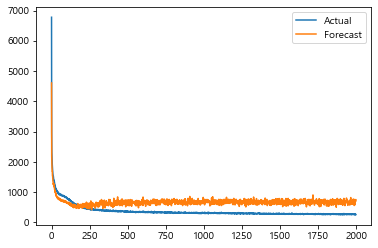

In [214]:
plt.plot(df3['loss'])
plt.plot(df3['val_loss'])
plt.legend(['Actual','Forecast'])
plt.show()

####  전체데이터 예측

In [215]:
pre3 = data3.drop('count',axis=1,inplace=False)
pre3

,yesterday,today,tomorrow,temp,cloud,precipitation,snowcover,user,hour
0,1,0,0,14.1,0.0,0.0,0.0,1.0,0
1,1,0,0,13.9,2.0,0.0,0.0,1.0,1
2,1,0,0,13.9,4.0,0.0,0.0,1.0,2
3,1,0,0,13.6,8.0,0.0,0.0,1.0,3
4,1,0,0,13.7,10.0,0.0,0.0,1.0,4
5,1,0,0,13.7,8.0,0.0,0.0,1.0,5
6,1,0,0,13.3,7.0,0.0,0.0,1.0,6
7,1,0,0,13.1,3.0,0.0,0.0,1.0,7
8,1,0,0,13.7,7.0,0.0,0.0,1.0,8
9,1,0,0,14.9,1.0,0.0,0.0,1.0,9


In [216]:
c = model.predict(pre3)
c

array([[38.745056],
       [18.45011 ],
       [14.5125  ],
       ...,
       [35.81399 ],
       [35.260715],
       [35.0158  ]], dtype=float32)

In [281]:
test1 = taxi.reset_index(inplace=False)
evaluate_regr(test1['count'],np.ravel(c))

MAE : 14.658, MSE : 497.555, RMSE : 22.306, RMSLE : 0.270


In [217]:
taxi['pred']=c
taxi

,o_time,yesterday,today,tomorrow,temp,windspeed,humidity,cloud,precipitation,snowcover,visibility,user,count,hour,pred
0,2018-10-01 00:00:00,1,0,0,14.1,2.6,55,0.0,0.0,0.0,2000,1.0,52,0,38.745056
1,2018-10-01 01:00:00,1,0,0,13.9,2.0,57,2.0,0.0,0.0,2000,1.0,17,1,18.450109
2,2018-10-01 02:00:00,1,0,0,13.9,2.4,56,4.0,0.0,0.0,2000,1.0,10,2,14.512500
3,2018-10-01 03:00:00,1,0,0,13.6,1.6,56,8.0,0.0,0.0,2000,1.0,13,3,13.261591
4,2018-10-01 04:00:00,1,0,0,13.7,1.9,56,10.0,0.0,0.0,2000,1.0,12,4,12.450652
5,2018-10-01 05:00:00,1,0,0,13.7,1.8,57,8.0,0.0,0.0,1999,1.0,8,5,11.792706
6,2018-10-01 06:00:00,1,0,0,13.3,2.3,56,7.0,0.0,0.0,2000,1.0,14,6,13.700511
7,2018-10-01 07:00:00,1,0,0,13.1,2.1,58,3.0,0.0,0.0,1997,1.0,31,7,22.346045
8,2018-10-01 08:00:00,1,0,0,13.7,2.4,54,7.0,0.0,0.0,1960,1.0,148,8,79.107651
9,2018-10-01 09:00:00,1,0,0,14.9,3.4,50,1.0,0.0,0.0,1989,1.0,130,9,115.937813


#### 실제값, 예측값 시각화

In [218]:
taxi.set_index('o_time',inplace=True)

##### 18-10-01 ~ 19-03-31 전체

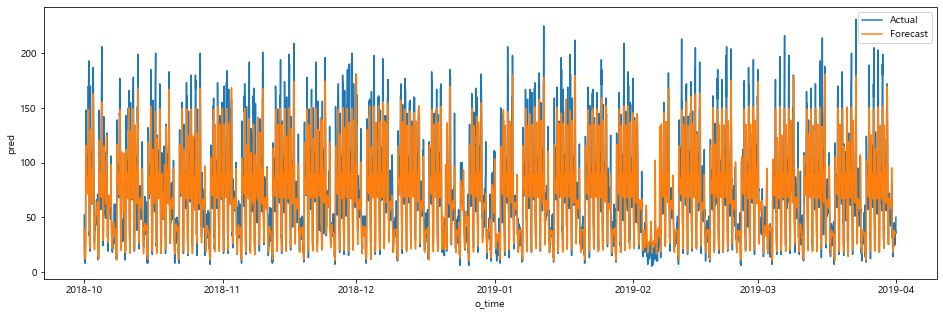

In [219]:
plt.figure(figsize=(16,5))
sns.lineplot(x=taxi.index,y='count',data=taxi)
sns.lineplot(x=taxi.index,y='pred',data=taxi)
plt.legend(['Actual','Forecast'])
plt.show()

##### 18-11-01 ~ 18-12-01 한달 

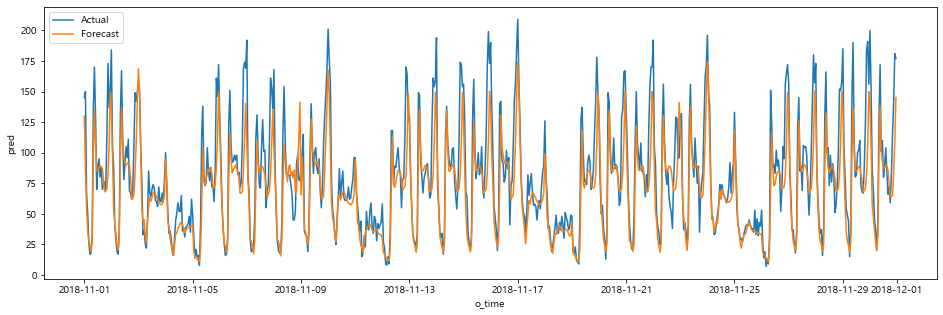

In [220]:
plt.figure(figsize=(16,5))
sns.lineplot(x=taxi['2018-11'].index,y='count',data=taxi['2018-11'])
sns.lineplot(x=taxi['2018-11'].index,y='pred',data=taxi['2018-11'])
plt.legend(['Actual','Forecast'])
plt.show()

##### 19-02-01 ~ 19-02-08 일주일

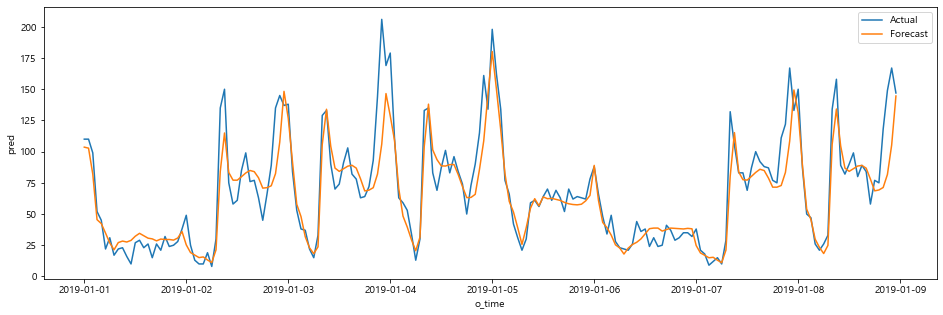

In [221]:
plt.figure(figsize=(16,5))
sns.lineplot(x=taxi['2019-01-01':'2019-01-08'].index,y='count',data=taxi['2019-01-01':'2019-01-08'])
sns.lineplot(x=taxi['2019-01-01':'2019-01-08'].index,y='pred',data=taxi['2019-01-01':'2019-01-08'])
plt.legend(['Actual','Forecast'])
plt.show()

### 날씨컬럼 중 풍속, 습도,시정 제외하고 훈련 & 예측 (유동인구 추가한 데이터셋)

#### 풍속,습도,시정 제외 데이터셋 생성

In [222]:
data4 = data2.drop(['windspeed','humidity','visibility'],axis=1,inplace=False)
data4

,yesterday,today,tomorrow,temp,cloud,precipitation,snowcover,pop,count,hour
0,1,0,0,14.1,0.0,0.0,0.0,299.31,52,0
1,1,0,0,13.9,2.0,0.0,0.0,196.59,17,1
2,1,0,0,13.9,4.0,0.0,0.0,173.37,10,2
3,1,0,0,13.6,8.0,0.0,0.0,131.52,13,3
4,1,0,0,13.7,10.0,0.0,0.0,254.17,12,4
5,1,0,0,13.7,8.0,0.0,0.0,1430.63,8,5
6,1,0,0,13.3,7.0,0.0,0.0,4227.82,14,6
7,1,0,0,13.1,3.0,0.0,0.0,12881.29,31,7
8,1,0,0,13.7,7.0,0.0,0.0,15716.97,148,8
9,1,0,0,14.9,1.0,0.0,0.0,8038.56,130,9


#### 훈련, 검증 데이터셋 분할

In [223]:
y_target4 = data4['count']
X_data4 = data4.drop(['count'], axis=1,inplace=False)

X_train4, X_test4, y_train4, y_test4 = train_test_split(X_data4, y_target4, test_size=0.3, random_state=156)

####  모델생성 & 훈련

In [224]:
model4 = create_model(X_train4.shape[1])
hist4 = model4.fit(X_train4, y_train4, validation_data=(X_test4, y_test4), epochs=2000, batch_size=100, shuffle=True, verbose=0)

#### 훈련 & 검증 LOSS, MSE, MAPE 확인

In [225]:
df4 = pd.DataFrame(hist4.history)
df4

,loss,mean_squared_error,mean_absolute_percentage_error,val_loss,val_mean_squared_error,val_mean_absolute_percentage_error
0,5060.915325,5060.915039,75.851128,3832.232693,3832.232910,63.991669
1,4029.669387,4029.669678,64.706169,3797.639639,3797.639893,63.720318
2,3958.251924,3958.252197,64.593903,3794.914708,3794.915039,63.533188
3,3943.463181,3943.462891,64.601639,3977.823824,3977.823486,63.725983
4,3922.142888,3922.143066,63.003273,3737.269732,3737.269531,63.153603
5,3903.927534,3903.927734,64.269440,3739.444822,3739.444580,62.765041
6,3854.911082,3854.911377,62.911617,3793.155386,3793.155518,62.448704
7,3786.745875,3786.745117,62.890656,3705.108164,3705.107910,61.826118
8,3760.564158,3760.564697,62.126129,3595.641603,3595.641846,60.784725
9,3692.786028,3692.785645,61.343079,3464.422817,3464.422607,58.957672


#### 최종 RMSE 확인

In [227]:
print('trian : %f \ntest : %f' % (np.sqrt(445.571747),np.sqrt(758.368835)))

trian : 21.108570 
test : 27.538497


#### 오차 시각화

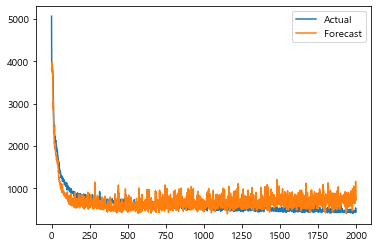

In [226]:
plt.plot(df4['loss'])
plt.plot(df4['val_loss'])
plt.legend(['Actual','Forecast'])
plt.show()

####  전체데이터 예측

In [228]:
pre4 = data4.drop('count',axis=1,inplace=False)
pre4

,yesterday,today,tomorrow,temp,cloud,precipitation,snowcover,pop,hour
0,1,0,0,14.1,0.0,0.0,0.0,299.31,0
1,1,0,0,13.9,2.0,0.0,0.0,196.59,1
2,1,0,0,13.9,4.0,0.0,0.0,173.37,2
3,1,0,0,13.6,8.0,0.0,0.0,131.52,3
4,1,0,0,13.7,10.0,0.0,0.0,254.17,4
5,1,0,0,13.7,8.0,0.0,0.0,1430.63,5
6,1,0,0,13.3,7.0,0.0,0.0,4227.82,6
7,1,0,0,13.1,3.0,0.0,0.0,12881.29,7
8,1,0,0,13.7,7.0,0.0,0.0,15716.97,8
9,1,0,0,14.9,1.0,0.0,0.0,8038.56,9


In [230]:
d = model4.predict(pre4)
d

array([[49.535038],
       [19.913267],
       [14.701328],
       ...,
       [29.74327 ],
       [29.18348 ],
       [36.64023 ]], dtype=float32)

In [282]:
test1 = taxi.reset_index(inplace=False)
evaluate_regr(test1['count'],np.ravel(d))

MAE : 18.545, MSE : 806.568, RMSE : 28.400, RMSLE : 0.343


In [231]:
taxi_add_pop['pred']=d
taxi_add_pop

,o_time,yesterday,today,tomorrow,temp,windspeed,humidity,cloud,precipitation,snowcover,visibility,pop,count,hour,pred
0,2018-10-01 00:00:00,1,0,0,14.1,2.6,55,0.0,0.0,0.0,2000,299.31,52,0,49.535038
1,2018-10-01 01:00:00,1,0,0,13.9,2.0,57,2.0,0.0,0.0,2000,196.59,17,1,19.913267
2,2018-10-01 02:00:00,1,0,0,13.9,2.4,56,4.0,0.0,0.0,2000,173.37,10,2,14.701328
3,2018-10-01 03:00:00,1,0,0,13.6,1.6,56,8.0,0.0,0.0,2000,131.52,13,3,11.773403
4,2018-10-01 04:00:00,1,0,0,13.7,1.9,56,10.0,0.0,0.0,2000,254.17,12,4,13.104538
5,2018-10-01 05:00:00,1,0,0,13.7,1.8,57,8.0,0.0,0.0,1999,1430.63,8,5,14.328148
6,2018-10-01 06:00:00,1,0,0,13.3,2.3,56,7.0,0.0,0.0,2000,4227.82,14,6,16.129692
7,2018-10-01 07:00:00,1,0,0,13.1,2.1,58,3.0,0.0,0.0,1997,12881.29,31,7,33.915371
8,2018-10-01 08:00:00,1,0,0,13.7,2.4,54,7.0,0.0,0.0,1960,15716.97,148,8,96.513313
9,2018-10-01 09:00:00,1,0,0,14.9,3.4,50,1.0,0.0,0.0,1989,8038.56,130,9,102.813972


#### 실제값, 예측값 시각화

In [232]:
taxi_add_pop.set_index('o_time',inplace=True)

##### 18-10-01 ~ 19-03-31 전체

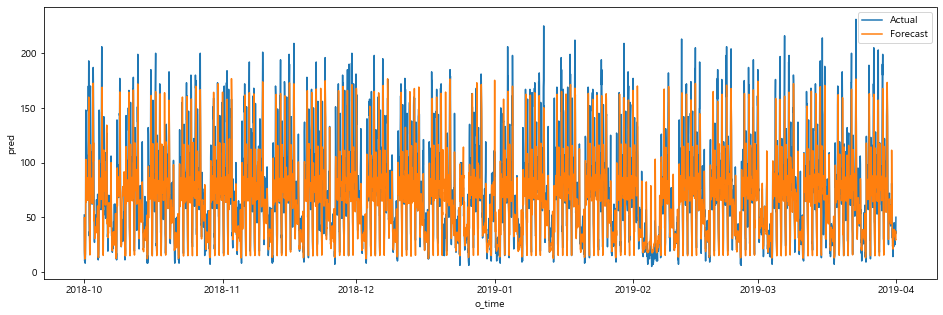

In [233]:
plt.figure(figsize=(16,5))
sns.lineplot(x=taxi_add_pop.index,y='count',data=taxi_add_pop)
sns.lineplot(x=taxi_add_pop.index,y='pred',data=taxi_add_pop)
plt.legend(['Actual','Forecast'])
plt.show()

##### 18-11-01 ~ 18-12-01 한달 

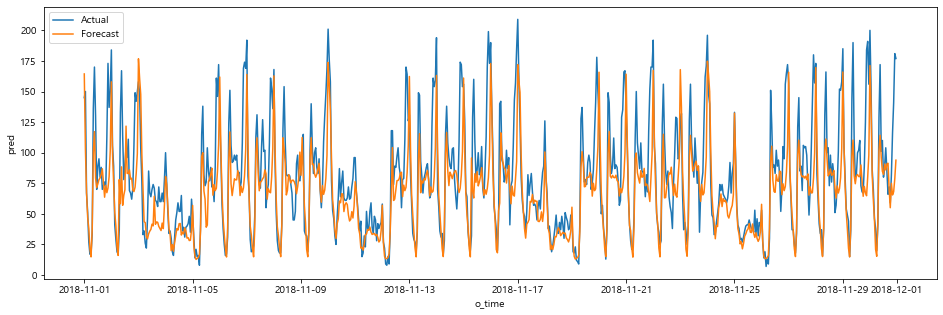

In [234]:
plt.figure(figsize=(16,5))
sns.lineplot(x=taxi_add_pop['2018-11'].index,y='count',data=taxi_add_pop['2018-11'])
sns.lineplot(x=taxi_add_pop['2018-11'].index,y='pred',data=taxi_add_pop['2018-11'])
plt.legend(['Actual','Forecast'])
plt.show()

##### 19-02-01 ~ 19-02-08 일주일

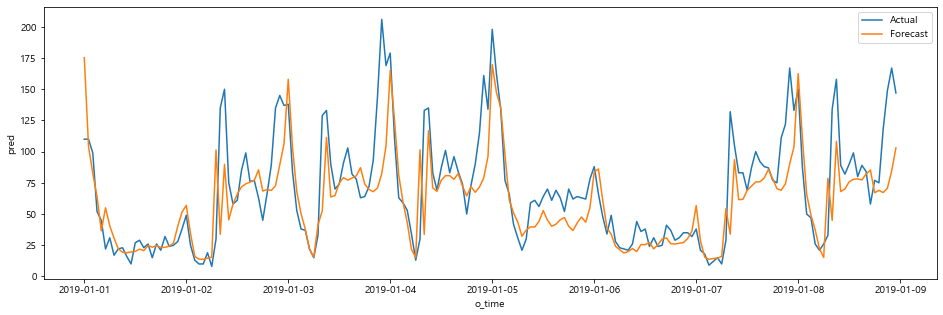

In [235]:
plt.figure(figsize=(16,5))
sns.lineplot(x=taxi_add_pop['2019-01-01':'2019-01-08'].index,y='count',data=taxi_add_pop['2019-01-01':'2019-01-08'])
sns.lineplot(x=taxi_add_pop['2019-01-01':'2019-01-08'].index,y='pred',data=taxi_add_pop['2019-01-01':'2019-01-08'])
plt.legend(['Actual','Forecast'])
plt.show()